In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("UNSW-NB15_4.csv")

In [7]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [8]:
df = df.drop(columns=["proto","service","state","attack_cat"])

In [9]:
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0


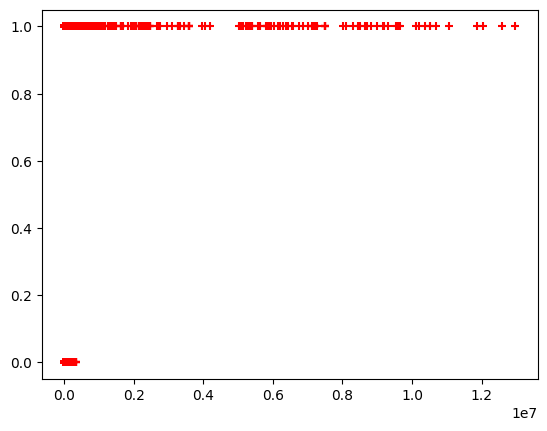

In [10]:
plt.scatter(df.sbytes,df.label,marker='+',color='red')

In [11]:

df.shape

(175341, 41)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [14]:
X_test.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
50751,50752,0.693970,10,6,1788,268,21.614766,254,252,1.855988e+04,2.582244e+03,2,1,72.806222,125.536203,3837.932242,193.192547,255,3779027475,3921120656,255,0.144638,0.066281,0.078357,179,45,0,0,4,1,1,1,1,1,0,0,0,2,1,0
65604,65605,43.180489,30,24,1778,1320,1.227406,254,252,3.184772e+02,2.343651e+02,11,14,3721.036630,4652.359500,460857.891500,15634.129000,255,975732889,2825958166,255,0.043681,0.032631,0.011050,59,55,0,0,6,1,3,3,3,6,0,0,0,3,6,0
33819,33820,1.104894,236,438,13558,548216,609.108181,31,29,9.775417e+04,3.960307e+06,21,197,4.740725,2.527341,1012.182408,737.173310,255,3451302155,1305710870,255,0.000575,0.000443,0.000132,57,1252,0,0,11,0,3,1,1,11,0,0,0,3,11,0
49949,49950,0.493444,4,2,632,496,10.132862,254,60,7.684763e+03,4.020720e+03,0,0,164.481328,0.010000,232.599719,0.000000,0,0,0,0,0.000000,0.000000,0.000000,158,248,0,0,1,0,3,1,1,1,0,0,0,2,1,0
159823,159824,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000e+00,0,0,0.003000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,28,2,13,12,12,28,0,0,0,12,28,0


In [15]:
y_test.head()

50751     1
65604     0
33819     0
49949     1
159823    1
Name: label, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

c:\Users\Artophilic\anaconda3\envs\netvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
clf.score(X_test,y_test)

0.8894180045054036

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80      8606
           1       0.97      0.88      0.92     26463

    accuracy                           0.89     35069
   macro avg       0.84      0.90      0.86     35069
weighted avg       0.91      0.89      0.89     35069



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_kn_pred = kn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_kn_pred))
print(confusion_matrix(y_test, y_kn_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11224
           1       0.96      0.97      0.97     23845

    accuracy                           0.96     35069
   macro avg       0.95      0.95      0.95     35069
weighted avg       0.96      0.96      0.96     35069

[[10356   868]
 [  606 23239]]


In [24]:
confusion_mat = confusion_matrix(y_kn_pred,y_test)

<Axes: >

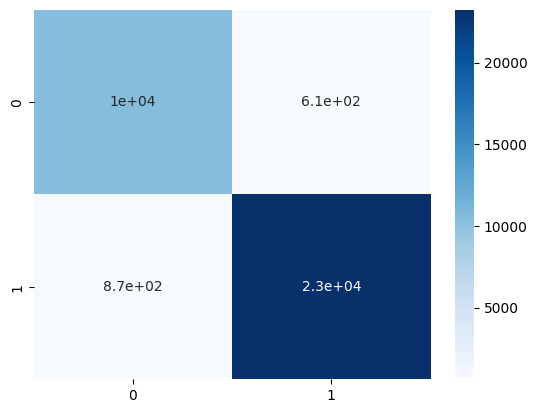

In [26]:
import seaborn as sns
sns.heatmap(confusion_mat, cmap="Blues", annot=True)

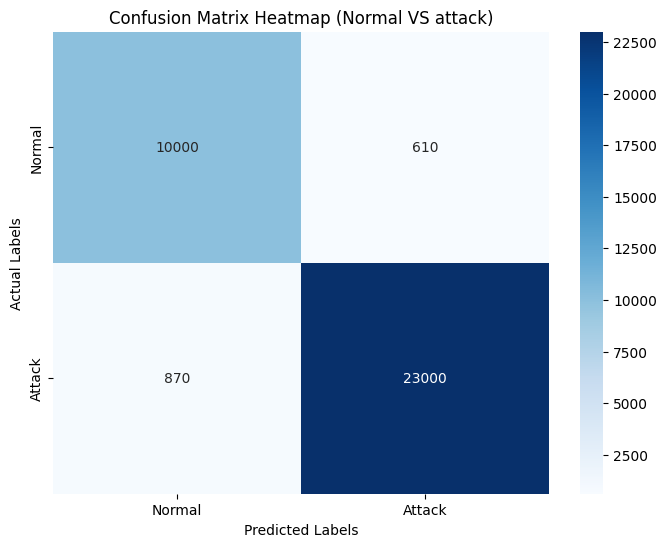

In [29]:
cm = np.array([[10000, 610], [870, 23000]])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()